In [55]:
# Clustering/Dimensionality Reduction
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

# DataScience
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("myopia.csv")

In [57]:
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [58]:
df2 = df.copy()

In [59]:
df.drop(columns = ["MYOPIC"], inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 67.7 KB


In [61]:
scaler = StandardScaler()
dfs = pd.DataFrame(scaler.fit_transform(df))
dfs.columns = df.columns
dfs.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


C:\Users\sajid\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


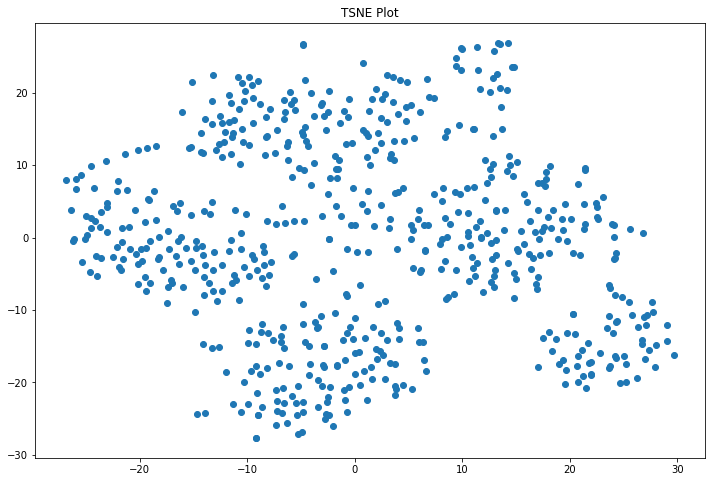

In [62]:
# Check for obvious clusters
X = TSNE(learning_rate="auto").fit_transform(dfs)

plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1])
plt.title("TSNE Plot")
plt.show()

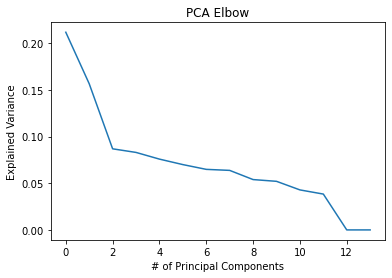

In [64]:
# Initialize PCA model
pca = PCA()
pca.fit(dfs)

plt.plot(range(len(df.columns)), pca.explained_variance_ratio_)
plt.xlabel("# of Principal Components")
plt.ylabel("Explained Variance")
plt.title("PCA Elbow")
plt.show()

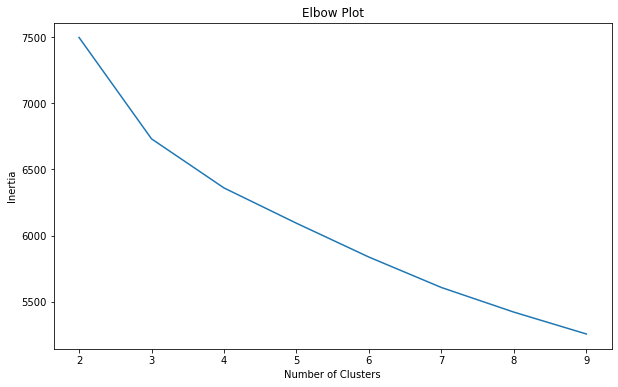

In [65]:
inertia = []
k_range = list(range(2, 10))

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dfs)
    
    inertia.append(kmeans.inertia_)
    
# make plot
plt.figure(figsize=(10,6))

plt.plot(k_range, inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Plot")

plt.show()

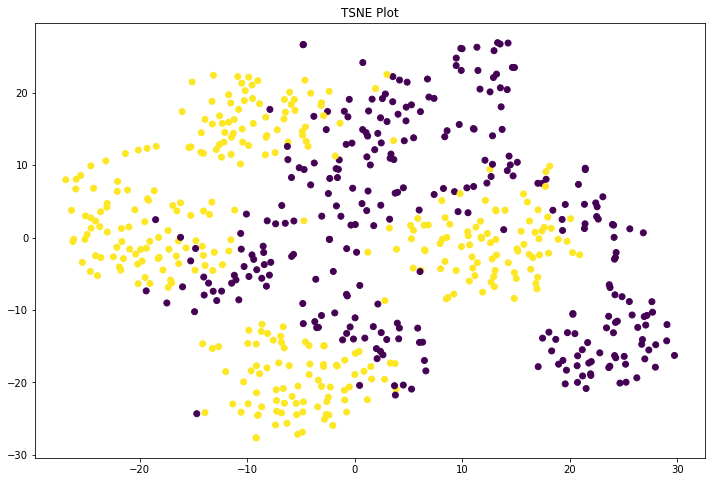

In [66]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(dfs)
preds = kmeans.predict(dfs)

plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1], c=preds)
plt.title("TSNE Plot")
plt.show()

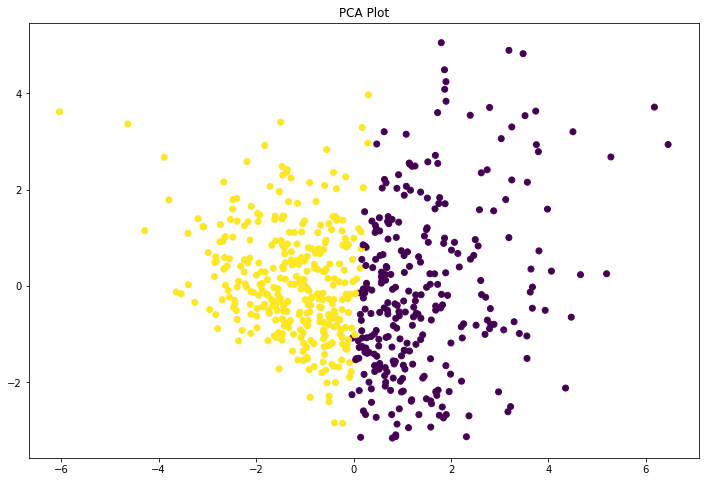

In [67]:
pca = PCA(n_components=2)
pca.fit(dfs)

components = pd.DataFrame(pca.transform(dfs), columns=["PCA1", "PCA2"])

components.head()

plt.figure(figsize=(12,8))

plt.scatter(components["PCA1"], components["PCA2"], c=preds)
plt.title("PCA Plot")
plt.show()

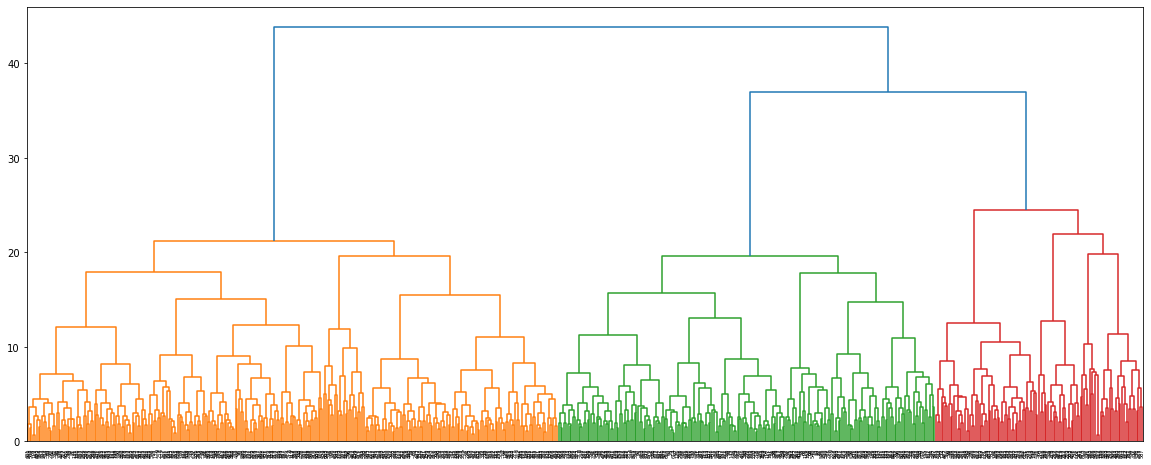

In [68]:
mergings = linkage(dfs, method="ward")

plt.figure(figsize=(20,8))

dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)

plt.show()

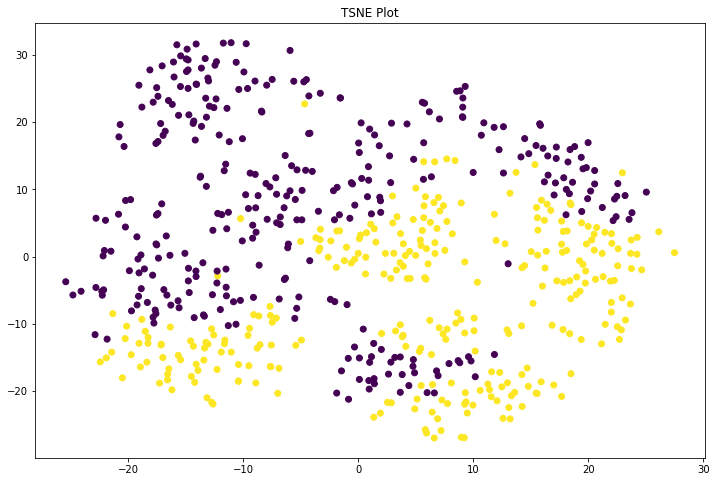

In [50]:
cluster = AgglomerativeClustering(
    n_clusters=2,
    affinity="euclidean",
    linkage="ward"
)

preds_agg = cluster.fit_predict(dfs)
plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1], c=preds_agg)
plt.title("TSNE Plot")
plt.show()

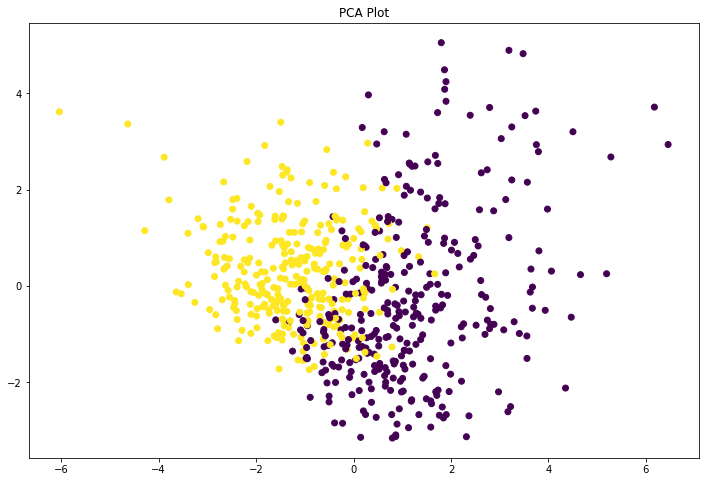

In [51]:
plt.figure(figsize=(12,8))

plt.scatter(components["PCA1"], components["PCA2"], c=preds_agg)
plt.title("PCA Plot")
plt.show()

In [69]:
df["MYOPIC"] = df2.MYOPIC
df["Preds_KMeans"] = preds
df["Preds_Agglom"] = preds_agg


In [70]:
df.groupby(["MYOPIC", "Preds_KMeans"]).size()

MYOPIC  Preds_KMeans
0       0               245
        1               292
1       0                42
        1                39
dtype: int64

In [71]:
df.groupby(["MYOPIC", "Preds_Agglom"]).size()

MYOPIC  Preds_Agglom
0       0               274
        1               263
1       0                50
        1                31
dtype: int64

Both models have failed rather spectacularly when trying to separate our patients into two clusters, one myopic and 
one normal, based on the data available. Of course, the models did not know what the target was, and may have been 
clustering for some mysterious and unknown target.

I tried different cluster sizes, and the best cluster size is probably five clusters. I stuck to two clusters because I 
wanted to see whether the two clusters would have any predictive value. The PCA elbow plot for KMEANs also shows a 
distinct kink at 2, meaning that this was not a bad decision.